In [1]:
from pathlib import Path

import acoular as ac

sfreq = 51200
duration = 1
nsamples = duration * sfreq
micgeofile = Path(ac.__file__).parent / 'xml' / 'array_64.xml'
h5savefile = Path('three_sources.h5')

m = ac.MicGeom(from_file=micgeofile)
n1 = ac.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=1)
n2 = ac.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=2, rms=0.7)
n3 = ac.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=3, rms=0.5)
p1 = ac.PointSource(signal=n1, mics=m, loc=(-0.1, -0.1, 0.3))
p2 = ac.PointSource(signal=n2, mics=m, loc=(0.15, 0, 0.3))
p3 = ac.PointSource(signal=n3, mics=m, loc=(0, 0.1, 0.3))
p = ac.Mixer(source=p1, sources=[p2, p3])
wh5 = ac.WriteH5(source=p, name=h5savefile)
wh5.save()


[('three_sources_cache.h5', 1)]
[('three_sources_cache.h5', 2)]


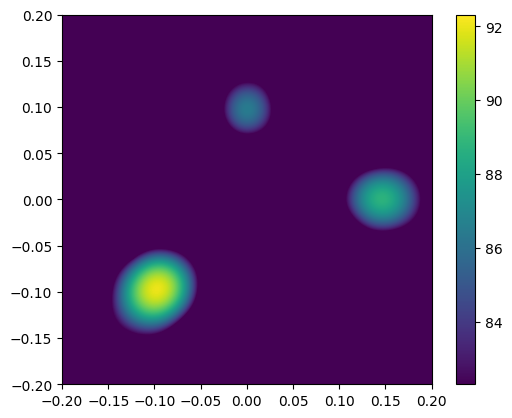

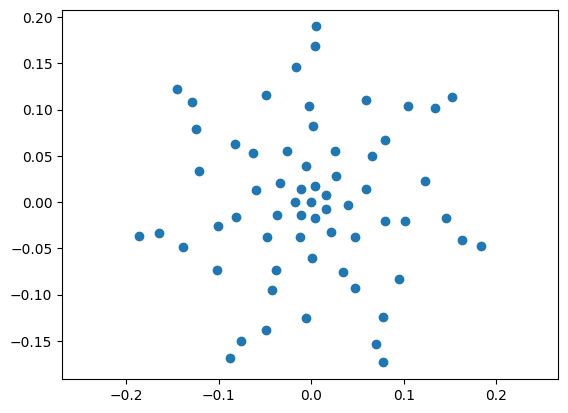

In [2]:
from pylab import axis, colorbar, figure, imshow, plot, show

datafile = h5savefile

mg = ac.MicGeom(from_file=micgeofile)
ts = ac.TimeSamples(name=datafile)
ps = ac.PowerSpectra(source=ts, block_size=128, window='Hanning')
rg = ac.RectGrid(x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01)
st = ac.SteeringVector(grid=rg, mics=mg)
bb = ac.BeamformerBase(freq_data=ps, steer=st)
pm = bb.synthetic(8000, 3)
Lm = ac.L_p(pm)
imshow(Lm.T, origin='lower', vmin=Lm.max() - 10, extent=rg.extend(), interpolation='bicubic')
colorbar()
figure(2)
plot(mg.mpos[0], mg.mpos[1], 'o')
axis('equal')
show()


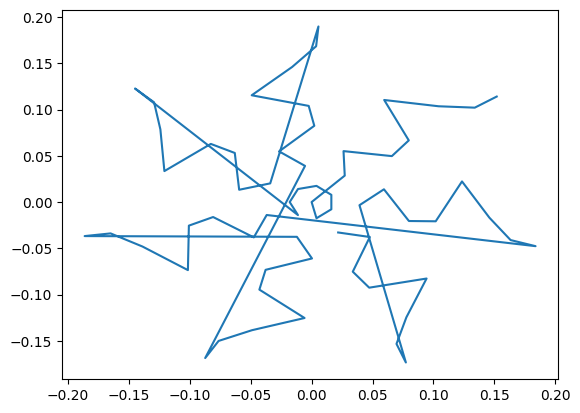

In [4]:
valores=[
	dict(Name="Point 	1	", x="	0.152	" ,y="	0.1141	" ,z="	0	"),
	dict(Name="Point 	2	", x="	0.134	" ,y="	0.1021	" ,z="	0	"),
	dict(Name="Point 	3	", x="	0.1043	" ,y="	0.1036	" ,z="	0	"),
	dict(Name="Point 	4	", x="	0.0596	" ,y="	0.1104	" ,z="	0	"),
	dict(Name="Point 	5	", x="	0.0798	" ,y="	0.0667	" ,z="	0	"),
	dict(Name="Point 	6	", x="	0.0659	" ,y="	0.0497	" ,z="	0	"),
	dict(Name="Point 	7	", x="	0.0262	" ,y="	0.0551	" ,z="	0	"),
	dict(Name="Point 	8	", x="	0.0272	" ,y="	0.0286	" ,z="	0	"),
	dict(Name="Point 	9	", x="	0	" ,y="	0	" ,z="	0	"),
	dict(Name="Point 	10	", x="	0.004	" ,y="	-0.0175	" ,z="	0	"),
	dict(Name="Point 	11	", x="	0.0162	" ,y="	-0.0078	" ,z="	0	"),
	dict(Name="Point 	12	", x="	0.0162	" ,y="	0.0078	" ,z="	0	"),
	dict(Name="Point 	13	", x="	0.004	" ,y="	0.0175	" ,z="	0	"),
	dict(Name="Point 	14	", x="	-0.0112	" ,y="	0.0141	" ,z="	0	"),
	dict(Name="Point 	15	", x="	-0.018	" ,y="	0	" ,z="	0	"),
	dict(Name="Point 	16	", x="	-0.0112	" ,y="	-0.0141	" ,z="	0	"),
	dict(Name="Point 	17	", x="	-0.145	" ,y="	0.1228	" ,z="	0	"),
	dict(Name="Point 	18	", x="	-0.1294	" ,y="	0.1079	" ,z="	0	"),
	dict(Name="Point 	19	", x="	-0.1242	" ,y="	0.0786	" ,z="	0	"),
	dict(Name="Point 	20	", x="	-0.1209	" ,y="	0.0335	" ,z="	0	"),
	dict(Name="Point 	21	", x="	-0.0828	" ,y="	0.0629	" ,z="	0	"),
	dict(Name="Point 	22	", x="	-0.0631	" ,y="	0.0531	" ,z="	0	"),
	dict(Name="Point 	23	", x="	-0.0595	" ,y="	0.0133	" ,z="	0	"),
	dict(Name="Point 	24	", x="	-0.034	" ,y="	0.0202	" ,z="	0	"),
	dict(Name="Point 	25	", x="	0.0056	" ,y="	0.1899	" ,z="	0	"),
	dict(Name="Point 	26	", x="	0.0037	" ,y="	0.1685	" ,z="	0	"),
	dict(Name="Point 	27	", x="	-0.016	" ,y="	0.1461	" ,z="	0	"),
	dict(Name="Point 	28	", x="	-0.0492	" ,y="	0.1155	" ,z="	0	"),
	dict(Name="Point 	29	", x="	-0.0024	" ,y="	0.104	" ,z="	0	"),
	dict(Name="Point 	30	", x="	0.0022	" ,y="	0.0825	" ,z="	0	"),
	dict(Name="Point 	31	", x="	-0.0267	" ,y="	0.0548	" ,z="	0	"),
	dict(Name="Point 	32	", x="	-0.0054	" ,y="	0.0391	" ,z="	0	"),
	dict(Name="Point 	33	", x="	-0.0874	" ,y="	-0.1687	" ,z="	0	"),
	dict(Name="Point 	34	", x="	-0.0764	" ,y="	-0.1502	" ,z="	0	"),
	dict(Name="Point 	35	", x="	-0.049	" ,y="	-0.1386	" ,z="	0	"),
	dict(Name="Point 	36	", x="	-0.0058	" ,y="	-0.1254	" ,z="	0	"),
	dict(Name="Point 	37	", x="	-0.0429	" ,y="	-0.0947	" ,z="	0	"),
	dict(Name="Point 	38	", x="	-0.0378	" ,y="	-0.0733	" ,z="	0	"),
	dict(Name="Point 	39	", x="	0.0003	" ,y="	-0.061	" ,z="	0	"),
	dict(Name="Point 	40	", x="	-0.0121	" ,y="	-0.0376	" ,z="	0	"),
	dict(Name="Point 	41	", x="	-0.1864	" ,y="	-0.0368	" ,z="	0	"),
	dict(Name="Point 	42	", x="	-0.1651	" ,y="	-0.0339	" ,z="	0	"),
	dict(Name="Point 	43	", x="	-0.1389	" ,y="	-0.0481	" ,z="	0	"),
	dict(Name="Point 	44	", x="	-0.1016	" ,y="	-0.0736	" ,z="	0	"),
	dict(Name="Point 	45	", x="	-0.1008	" ,y="	-0.0255	" ,z="	0	"),
	dict(Name="Point 	46	", x="	-0.0809	" ,y="	-0.0162	" ,z="	0	"),
	dict(Name="Point 	47	", x="	-0.0475	" ,y="	-0.0382	" ,z="	0	"),
	dict(Name="Point 	48	", x="	-0.0369	" ,y="	-0.014	" ,z="	0	"),
	dict(Name="Point 	49	", x="	0.1839	" ,y="	-0.0477	" ,z="	0	"),
	dict(Name="Point 	50	", x="	0.1634	" ,y="	-0.0411	" ,z="	0	"),
	dict(Name="Point 	51	", x="	0.146	" ,y="	-0.0169	" ,z="	0	"),
	dict(Name="Point 	52	", x="	0.1235	" ,y="	0.0223	" ,z="	0	"),
	dict(Name="Point 	53	", x="	0.1019	" ,y="	-0.0208	" ,z="	0	"),
	dict(Name="Point 	54	", x="	0.0799	" ,y="	-0.0205	" ,z="	0	"),
	dict(Name="Point 	55	", x="	0.0594	" ,y="	0.0138	" ,z="	0	"),
	dict(Name="Point 	56	", x="	0.0393	" ,y="	-0.0034	" ,z="	0	"),
	dict(Name="Point 	57	", x="	0.0774	" ,y="	-0.1735	" ,z="	0	"),
	dict(Name="Point 	58	", x="	0.0697	" ,y="	-0.1534	" ,z="	0	"),
	dict(Name="Point 	59	", x="	0.0778	" ,y="	-0.1247	" ,z="	0	"),
	dict(Name="Point 	60	", x="	0.0944	" ,y="	-0.0827	" ,z="	0	"),
	dict(Name="Point 	61	", x="	0.0473	" ,y="	-0.0926	" ,z="	0	"),
	dict(Name="Point 	62	", x="	0.0338	" ,y="	-0.0753	" ,z="	0	"),
	dict(Name="Point 	63	", x="	0.0478	" ,y="	-0.0378	" ,z="	0	"),
	dict(Name="Point 	64	", x="	0.0218	" ,y="	-0.0329	" ,z="0"),
]
import pandas as pd 
import matplotlib.pyplot as plt 
valores = pd.DataFrame([{k:v.replace(" ", "").replace("\t", "") for k, v in d.items()} for d in valores])

plt.plot(pd.to_numeric(valores.x), pd.to_numeric(valores.y))

In [1]:

import numpy as np 
N_mics = 64
angle_rotation = np.pi * 2 / N_mics
rotation_matrix = np.array([
    [np.cos(angle_rotation), -np.sin(angle_rotation)],
    [np.sin(angle_rotation), np.cos(angle_rotation)]
])
mic_positions = []
xml_text = []
for i in range(N_mics):
    last_position = mic_positions[-1] if mic_positions else np.array([1, 0])*0.0005
    new_pos = np.matmul(rotation_matrix, last_position)
    mic_positions.append(new_pos)
    new_pos_shifted = new_pos - mic_positions[0]
    xml_text.append(f'<pos Name="Point {i+1}" x="{new_pos_shifted[0]:.4f}" y="{new_pos_shifted[1]:.4f}" z="0" />')

#mic_positions = np.stack(mic_positions)

xml = f"""<?xml version="1.0" encoding="utf-8"?>									
<MicArray name="array_{N_mics}">	
    {"\n".join(xml_text)}
</MicArray>
"""
print(xml)

<?xml version="1.0" encoding="utf-8"?>									
<MicArray name="array_64">	
    <pos Name="Point 1" x="0.0000" y="0.0000" z="0" />
<pos Name="Point 2" x="-0.0000" y="0.0000" z="0" />
<pos Name="Point 3" x="-0.0000" y="0.0001" z="0" />
<pos Name="Point 4" x="-0.0000" y="0.0001" z="0" />
<pos Name="Point 5" x="-0.0001" y="0.0002" z="0" />
<pos Name="Point 6" x="-0.0001" y="0.0002" z="0" />
<pos Name="Point 7" x="-0.0001" y="0.0003" z="0" />
<pos Name="Point 8" x="-0.0001" y="0.0003" z="0" />
<pos Name="Point 9" x="-0.0002" y="0.0003" z="0" />
<pos Name="Point 10" x="-0.0002" y="0.0004" z="0" />
<pos Name="Point 11" x="-0.0003" y="0.0004" z="0" />
<pos Name="Point 12" x="-0.0003" y="0.0004" z="0" />
<pos Name="Point 13" x="-0.0004" y="0.0004" z="0" />
<pos Name="Point 14" x="-0.0004" y="0.0004" z="0" />
<pos Name="Point 15" x="-0.0004" y="0.0004" z="0" />
<pos Name="Point 16" x="-0.0005" y="0.0005" z="0" />
<pos Name="Point 17" x="-0.0005" y="0.0004" z="0" />
<pos Name="Point 18" x="-0.00

In [1]:

import numpy as np 
N_mics = 64
angle_rotation = np.pi * 2 / N_mics
rotation_matrix = np.array([
    [np.cos(angle_rotation), -np.sin(angle_rotation)],
    [np.sin(angle_rotation), np.cos(angle_rotation)]
])
mic_positions = []
xml_text = []
for i in range(N_mics):
    new_pos = np.random.randn(2)*0.01
    mic_positions.append(new_pos)
    new_pos_shifted = new_pos - mic_positions[0]
    xml_text.append(f'<pos Name="Point {i+1}" x="{new_pos_shifted[0]:.4f}" y="{new_pos_shifted[1]:.4f}" z="0" />')

#mic_positions = np.stack(mic_positions)

xml = f"""<?xml version="1.0" encoding="utf-8"?>									
<MicArray name="array_{N_mics}">	
    {"\n".join(xml_text)}
</MicArray>
"""
print(xml)

<?xml version="1.0" encoding="utf-8"?>									
<MicArray name="array_64">	
    <pos Name="Point 1" x="0.0000" y="0.0000" z="0" />
<pos Name="Point 2" x="-0.0197" y="0.0059" z="0" />
<pos Name="Point 3" x="-0.0084" y="0.0115" z="0" />
<pos Name="Point 4" x="-0.0063" y="0.0112" z="0" />
<pos Name="Point 5" x="0.0168" y="-0.0008" z="0" />
<pos Name="Point 6" x="0.0061" y="0.0138" z="0" />
<pos Name="Point 7" x="0.0102" y="-0.0031" z="0" />
<pos Name="Point 8" x="0.0123" y="-0.0155" z="0" />
<pos Name="Point 9" x="0.0180" y="0.0129" z="0" />
<pos Name="Point 10" x="-0.0056" y="0.0151" z="0" />
<pos Name="Point 11" x="-0.0076" y="0.0117" z="0" />
<pos Name="Point 12" x="-0.0049" y="0.0112" z="0" />
<pos Name="Point 13" x="0.0176" y="-0.0026" z="0" />
<pos Name="Point 14" x="0.0187" y="0.0051" z="0" />
<pos Name="Point 15" x="0.0100" y="-0.0025" z="0" />
<pos Name="Point 16" x="0.0015" y="0.0145" z="0" />
<pos Name="Point 17" x="0.0099" y="0.0178" z="0" />
<pos Name="Point 18" x="-0.0006" y

In [2]:
with open(f"mic_array_{N_mics}.xml", "w") as f:
    f.write(xml)

In [3]:
from pathlib import Path

import acoular as ac

sfreq = 51200
duration = 1
nsamples = duration * sfreq
micgeofile = Path(f'mic_array_{N_mics}.xml')
h5savefile = Path('three_sources.h5')

m = ac.MicGeom(from_file=micgeofile)
n1 = ac.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=1)
n2 = ac.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=2, rms=0.7)
n3 = ac.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=3, rms=0.5)
p1 = ac.PointSource(signal=n1, mics=m, loc=(-0.1, -0.1, 0.3))
p2 = ac.PointSource(signal=n2, mics=m, loc=(0.15, 0, 0.3))
p3 = ac.PointSource(signal=n3, mics=m, loc=(0, 0.1, 0.3))
p = ac.Mixer(source=p1, sources=[p2, p3])
wh5 = ac.WriteH5(source=p, name=h5savefile)
wh5.save()


/home/joaquintz/res/thebird/.venv/lib/python3.12/site-packages/numpy/__config__.py:155: UserWarning: Install `pyyaml` for better output
  warnings.warn("Install `pyyaml` for better output", stacklevel=1)
/home/joaquintz/res/thebird/.venv/lib/python3.12/site-packages/acoular/__init__.py:10: UserWarning: We detected that Numpy is already loaded and uses OpenBLAS. Because this conflicts with Numba parallel execution, we disable parallel execution for now and processing might be slower. To speed up, either import Numpy after Acoular or set environment variable OPENBLAS_NUM_THREADS=1 before start of the program.
  from .configuration import config


[('three_sources_cache.h5', 1)]
[('three_sources_cache.h5', 2)]


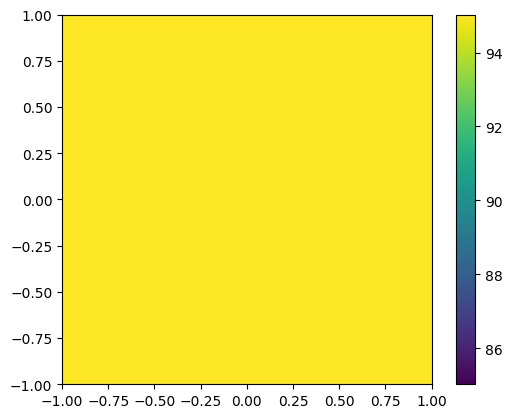

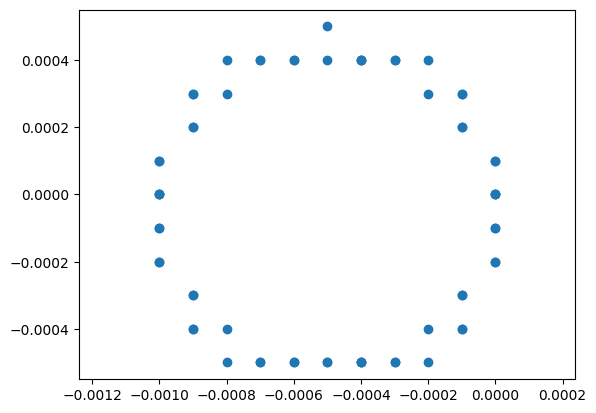

In [4]:
from pylab import axis, colorbar, figure, imshow, plot, show

datafile = h5savefile

mg = ac.MicGeom(from_file=micgeofile)
ts = ac.TimeSamples(name=datafile)
ps = ac.PowerSpectra(source=ts, block_size=128, window='Hanning')
#rg = ac.RectGrid(x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01)
rg = ac.RectGrid(x_min=-1, x_max=1, y_min=-1, y_max=1, z=0.3, increment=0.01)
st = ac.SteeringVector(grid=rg, mics=mg)
bb = ac.BeamformerBase(freq_data=ps, steer=st)
pm = bb.synthetic(8000, 3)
Lm = ac.L_p(pm)
imshow(Lm.T, origin='lower', vmin=Lm.max() - 10, extent=rg.extend(), interpolation='bicubic')
colorbar()
figure(2)
plot(mg.mpos[0], mg.mpos[1], 'o')
axis('equal')
show()
